In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
# Load dataframe
df1 = pd.read_csv("Bayut Data.csv")
df1.head()

,price,beds_baths_area,address
0,"30,000",01396 sqft,"Azizi Plaza, Al Furjan"
1,"250,000","363,881 sqft",Emirates Crown Marina
2,"90,000",11821 sqft,Azure Marina
3,"210,000","342,182 sqft","Al Basri, Shoreline Apartments, Palm Jumeirah"
4,"70,000",11736 sqft,Elite Residence Marina


# Data Cleaning

First the price series will be reformatted. It cointains commas in the values and is in string format instead of float

In [3]:
df1['price'] = df1['price'].str.replace(',','')
df1['price'] = df1.price.astype(float)
df1.head()

,price,beds_baths_area,address
0,30000.0,01396 sqft,"Azizi Plaza, Al Furjan"
1,250000.0,"363,881 sqft",Emirates Crown Marina
2,90000.0,11821 sqft,Azure Marina
3,210000.0,"342,182 sqft","Al Basri, Shoreline Apartments, Palm Jumeirah"
4,70000.0,11736 sqft,Elite Residence Marina


The first integer of the beds_baths_area series represents the number of bedrooms in the apartment (0 means it is a studio apartment). The second integer is the number of bedrooms, and the rest of the integers represent the area in sqft.

The following will be done to this series: 

    - the sqft will be dropped
    
    - comma will be removed
    
    - it will be broken into 3 series: beds, baths and area
    
    - all these new series will be stored as float/int

In [4]:
# drop the sqft
df1['beds_baths_area'] = df1['beds_baths_area'].apply(lambda x: x.split(' ')[0])
# remove the comma
df1['beds_baths_area'] = df1['beds_baths_area'].str.replace(',','')
df1.head()

,price,beds_baths_area,address
0,30000.0,01396,"Azizi Plaza, Al Furjan"
1,250000.0,363881,Emirates Crown Marina
2,90000.0,11821,Azure Marina
3,210000.0,342182,"Al Basri, Shoreline Apartments, Palm Jumeirah"
4,70000.0,11736,Elite Residence Marina


In [5]:
# splits and stores into new columns
df1['beds'] = df1.beds_baths_area.astype(str).str[:1]
df1['baths'] = df1.beds_baths_area.astype(str).str[1:2]
df1['area'] = df1.beds_baths_area.astype(str).str[2:]
# converts to float
df1['beds'] = df1.beds.astype(float)
df1['baths'] = df1.baths.astype(float)
df1['area'] = df1.area.astype(float)
df1.head()

,price,beds_baths_area,address,beds,baths,area
0,30000.0,01396,"Azizi Plaza, Al Furjan",0.0,1.0,396.0
1,250000.0,363881,Emirates Crown Marina,3.0,6.0,3881.0
2,90000.0,11821,Azure Marina,1.0,1.0,821.0
3,210000.0,342182,"Al Basri, Shoreline Apartments, Palm Jumeirah",3.0,4.0,2182.0
4,70000.0,11736,Elite Residence Marina,1.0,1.0,736.0


In [6]:
df2 = df1.drop('beds_baths_area', axis='columns')
df2.head()

,price,address,beds,baths,area
0,30000.0,"Azizi Plaza, Al Furjan",0.0,1.0,396.0
1,250000.0,Emirates Crown Marina,3.0,6.0,3881.0
2,90000.0,Azure Marina,1.0,1.0,821.0
3,210000.0,"Al Basri, Shoreline Apartments, Palm Jumeirah",3.0,4.0,2182.0
4,70000.0,Elite Residence Marina,1.0,1.0,736.0


Now the address series needs to be processed. My aim is to predict prices based on area, not based on specific building. Because of this I will remove the names of the buildings and just leave the name of the area.


In [7]:
temp = df2['address'].str.split(',', n=1, expand=True)
temp = temp.fillna(value=0)
temp["address"] = np.where(temp[1]== 0, temp[0], temp[1])
temp.head()

,0,1,address
0,Azizi Plaza,Al Furjan,Al Furjan
1,Emirates Crown Marina,0,Emirates Crown Marina
2,Azure Marina,0,Azure Marina
3,Al Basri,"Shoreline Apartments, Palm Jumeirah","Shoreline Apartments, Palm Jumeirah"
4,Elite Residence Marina,0,Elite Residence Marina


In [8]:
temp2 = temp['address'].str.split(',', n=1, expand=True)
temp2 = temp2.fillna(value=0)
temp2["address"] = np.where(temp2[1]== 0, temp2[0], temp2[1])
temp2.head()

,0,1,address
0,Al Furjan,0,Al Furjan
1,Emirates Crown Marina,0,Emirates Crown Marina
2,Azure Marina,0,Azure Marina
3,Shoreline Apartments,Palm Jumeirah,Palm Jumeirah
4,Elite Residence Marina,0,Elite Residence Marina


In [9]:
temp3 = temp2['address'].str.split(',', n=1, expand=True)
temp3 = temp3.fillna(value=0)
temp3["address"] = np.where(temp3[1]== 0, temp3[0], temp3[1])
temp3.head()

,0,1,address
0,Al Furjan,0,Al Furjan
1,Emirates Crown Marina,0,Emirates Crown Marina
2,Azure Marina,0,Azure Marina
3,Palm Jumeirah,0,Palm Jumeirah
4,Elite Residence Marina,0,Elite Residence Marina


In [53]:
df3 = df2.copy()
df3['location'] = temp3['address']
# removes leading spaces
df3['location'] = df3['location'].str.lstrip()
df3.head()

,price,address,beds,baths,area,location
0,30000.0,"Azizi Plaza, Al Furjan",0.0,1.0,396.0,Al Furjan
1,250000.0,Emirates Crown Marina,3.0,6.0,3881.0,Emirates Crown Marina
2,90000.0,Azure Marina,1.0,1.0,821.0,Azure Marina
3,210000.0,"Al Basri, Shoreline Apartments, Palm Jumeirah",3.0,4.0,2182.0,Palm Jumeirah
4,70000.0,Elite Residence Marina,1.0,1.0,736.0,Elite Residence Marina


In [11]:
df3.location.unique()

array(['Al Furjan', 'Emirates Crown Marina', 'Azure Marina',
       'Palm Jumeirah', 'Elite Residence Marina', 'Bur Dubai', 'Arjan',
       'ANWA Maritime City', 'The Lagoons',
       'Elite Sports Residence Sports City',
       'Jumeirah Village Circle (JVC)', 'Downtown Dubai',
       'Emerald Residence Marina', 'Motor City',
       'La Residence Del Mar Marina', 'The Hills', 'Al Jaddaf',
       'Jumeirah Beach Residence (JBR)', 'The Greens',
       'Damac Heights Marina', 'The Gate Residence 1 Residence Complex',
       'Al Seef Tower Marina', 'Marina Mansions Marina',
       'International City', 'Executive Residences Hills Estate',
       'Jumeirah Lake Towers (JLT)', 'National Bonds Oasis Silicon Oasis',
       'SOL Star Investment Park (DIP)', 'Green Community',
       'Business Bay', 'Arena Apartments Sports City',
       'Barsha Heights (Tecom)', 'Culture Village',
       'H40 Building Production City (IMPZ)', 'Al Wasl',
       'Binghatti Views Silicon Oasis', 'Al Barsha',
    

After seeing all the unique locations, I can see that Marina, Silicon Oasis and Sports City all exist as unique locations with slight variations. For example, there is Emirates Crown Marina, Azure Marina, etc. I want to group all these into single locations.

In [12]:
df4 = df3.copy()
df4.loc[df4['location'].str.contains('Marina', case=False), 'location'] = 'Marina'
df4.loc[df4['location'].str.contains('Silicon Oasis', case=False), 'location'] = 'Silicon Oasis'
df4.loc[df4['location'].str.contains('Sports City', case=False), 'location'] = 'Sports City'
df4.head()

,price,address,beds,baths,area,location
0,30000.0,"Azizi Plaza, Al Furjan",0.0,1.0,396.0,Al Furjan
1,250000.0,Emirates Crown Marina,3.0,6.0,3881.0,Marina
2,90000.0,Azure Marina,1.0,1.0,821.0,Marina
3,210000.0,"Al Basri, Shoreline Apartments, Palm Jumeirah",3.0,4.0,2182.0,Palm Jumeirah
4,70000.0,Elite Residence Marina,1.0,1.0,736.0,Marina


In [13]:
df5 = df4.drop('address', axis='columns')
df5.head()

,price,beds,baths,area,location
0,30000.0,0.0,1.0,396.0,Al Furjan
1,250000.0,3.0,6.0,3881.0,Marina
2,90000.0,1.0,1.0,821.0,Marina
3,210000.0,3.0,4.0,2182.0,Palm Jumeirah
4,70000.0,1.0,1.0,736.0,Marina


# Feature Engineering

I will create a new feature called price_per_sqft. This feature is very important as it allows us to accurately compare apartment prices between areas.

In [14]:
df5 = df4.copy()
df5['price_per_sqft']= df5['price']/df5['area']
df5 = df5.drop('address', axis=1)
df5.head()

,price,beds,baths,area,location,price_per_sqft
0,30000.0,0.0,1.0,396.0,Al Furjan,75.757576
1,250000.0,3.0,6.0,3881.0,Marina,64.416388
2,90000.0,1.0,1.0,821.0,Marina,109.622412
3,210000.0,3.0,4.0,2182.0,Palm Jumeirah,96.241980
4,70000.0,1.0,1.0,736.0,Marina,95.108696


If an area has less than 10 enteries, then I will not include it as its own area and will group it into other. This is because if there are less than 3 entries then the price for different numbers of bathrooms and bedrooms can't be accurately predicted.

In [15]:
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
len(df5.location.unique())

157

In [16]:
location_stats_less_than_10 = location_stats[location_stats<10]
location_stats_less_than_10

location
Dubai Production City (IMPZ)                      9
JVC District 15, Jumeirah Village Circle (JVC)    8
Ewan Residence Investment Park (DIP)              8
DAMAC Hills 2 (Akoya by DAMAC)                    7
Al Safa                                           7
                                                 ..
Downtown Jebel Ali                                1
Aston Towers Science Park                         1
Munira Residence Residence Complex                1
Oakwood Residency Production City (IMPZ)          1
Golden Sands Investment Park (DIP)                1
Name: location, Length: 74, dtype: int64

In [17]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique()) # the number of unique locations has been reduced by almost 70

84

# Outlier Detection

In [18]:
df6 = df5.copy()

Text(0, 0.5, 'Count')

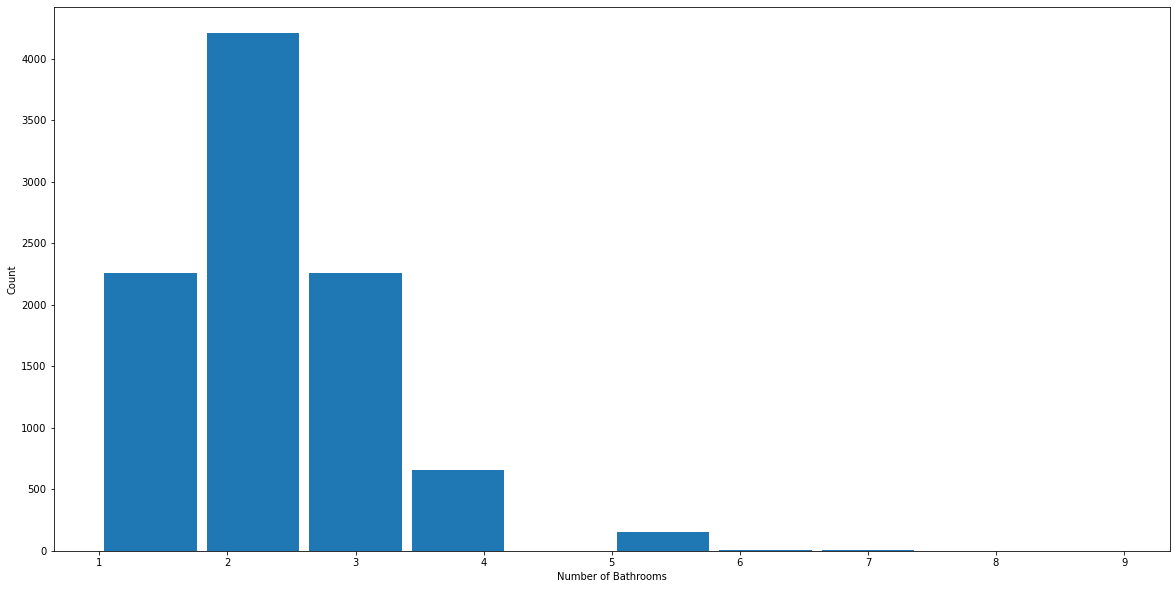

In [19]:
plt.hist(df6.baths, rwidth = 0.9)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

By looking at the distribution, I can see that most apartments have less than 5 bathrooms. Having more seems to be either outliers or erronious values. So I will further investigate this.

In [20]:
df6.beds.unique()
df6.baths.unique()
df6.shape

(9551, 6)

The max number of beds is 5 but the max number of baths is 9. This does't allign with how properties usually are.  Usuaslly the number of baths is less than (no. of beds + 2). So I will look at the apartments that don't follow this general rule

In [21]:
df6[df6.baths>(df6.beds+2)]
#df6.shape # has shape (9551, 5)

,price,beds,baths,area,location,price_per_sqft
1,250000.0,3.0,6.0,3881.0,Marina,64.416388
653,40000.0,1.0,6.0,50.0,Bur Dubai,800.000000
885,32000.0,0.0,5.0,70.0,Discovery Gardens,457.142857
939,42000.0,1.0,7.0,50.0,Deira,840.000000
1095,20000.0,0.0,4.0,84.0,International City,238.095238
1203,20000.0,0.0,3.0,10.0,Phase 2 Investment Park (DIP),2000.000000
1556,35000.0,0.0,5.0,0.0,Bur Dubai,inf
1664,59999.0,1.0,7.0,99.0,Barsha Heights (Tecom),606.050505
1691,28000.0,0.0,4.0,6.0,DAMAC Hills,4666.666667
2130,45000.0,1.0,9.0,65.0,Jumeirah Village Circle (JVC),692.307692


by looking at the results from the above query, it is obvious that the majority of apartments which don't follow the general beds + 2 rule are erronious values. For example one apartent has an area of 65 sqft, has 1 bedroom but also has 7 bathrooms. Some are outliers but these are rear. Because of this I will remove all apartments that don't meet this criteria

In [22]:
df6 = df6[df6.baths<=df6.beds+2]
df6.shape # 30 erronious values have been removed

(9521, 6)

Using the price_per_sqft feature, I will identify outliers or erronious values in the area and price column

In [23]:
df6.price_per_sqft.describe()

count    9521.000000
mean             inf
std              NaN
min         0.536406
25%        45.257543
50%        56.497175
75%        77.903683
max              inf
Name: price_per_sqft, dtype: float64

The price can't be infinity, so these errors must be removed

In [24]:
df6.sort_values(by='price_per_sqft')

,price,beds,baths,area,location,price_per_sqft
1600,46000.0,1.0,2.0,85756.0,Arjan,0.536406
4348,164999.0,3.0,4.0,7330.0,other,22.510095
6276,46000.0,2.0,2.0,2000.0,Al Nahda (Dubai),23.000000
6893,46000.0,2.0,3.0,2000.0,Al Qusais,23.000000
2177,36990.0,2.0,2.0,1600.0,Al Nahda (Dubai),23.118750
...,...,...,...,...,...,...
6488,42000.0,1.0,1.0,5.0,Silicon Oasis,8400.000000
7941,115000.0,3.0,2.0,13.0,Bur Dubai,8846.153846
8534,83999.0,3.0,1.0,9.0,Wasl Gate,9333.222222
632,45000.0,2.0,1.0,0.0,Bur Dubai,inf


after 9333, the price_per_sqft become inf, so I'll remove all values greater than 10,000

In [25]:
df7 = df6[df6['price_per_sqft'] < 10000]  
df7.price_per_sqft.describe()

count    9519.000000
mean       70.859013
std       171.178205
min         0.536406
25%        45.253206
50%        56.488550
75%        77.879177
max      9333.222222
Name: price_per_sqft, dtype: float64

The min and max values are still extreme, so this means that outliers must be removed, this will be done by using the IQR.

In [26]:
def remove_rps_outliers(df): # this funnction takes the data frame as the input
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'): # the dataframe is grouped by location
        q1 = np.quantile(subdf.price_per_sqft, 0.25)
        q2 = np.quantile(subdf.price_per_sqft, 0.50)
        q3 = np.quantile(subdf.price_per_sqft, 0.75)
        iqr = 1.5*(q3-q1)
        reduced_df = subdf[(subdf.price_per_sqft>(q2-iqr)) & (subdf.price_per_sqft<=(q2+iqr))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df8 = remove_rps_outliers(df7)
df8.shape
df8.price_per_sqft.describe()

count    8764.000000
mean       63.772931
std        29.577058
min        22.510095
25%        44.444444
50%        55.099662
75%        72.916667
max       303.250849
Name: price_per_sqft, dtype: float64

They look much more reasonable now

In [27]:
df9 = df8.copy()
df9['rent_per_sqft'] = df9['price_per_sqft']
df9 = df9.drop('price_per_sqft', axis='columns')
df9.head()

,price,beds,baths,area,location,rent_per_sqft
0,18500.0,0.0,1.0,320.0,Academic City,57.812500
1,18499.0,0.0,1.0,273.0,Academic City,67.761905
2,38500.0,2.0,3.0,1170.0,Academic City,32.905983
3,17999.0,0.0,1.0,385.0,Academic City,46.750649
4,19500.0,0.0,1.0,410.0,Academic City,47.560976


(8764, 6)

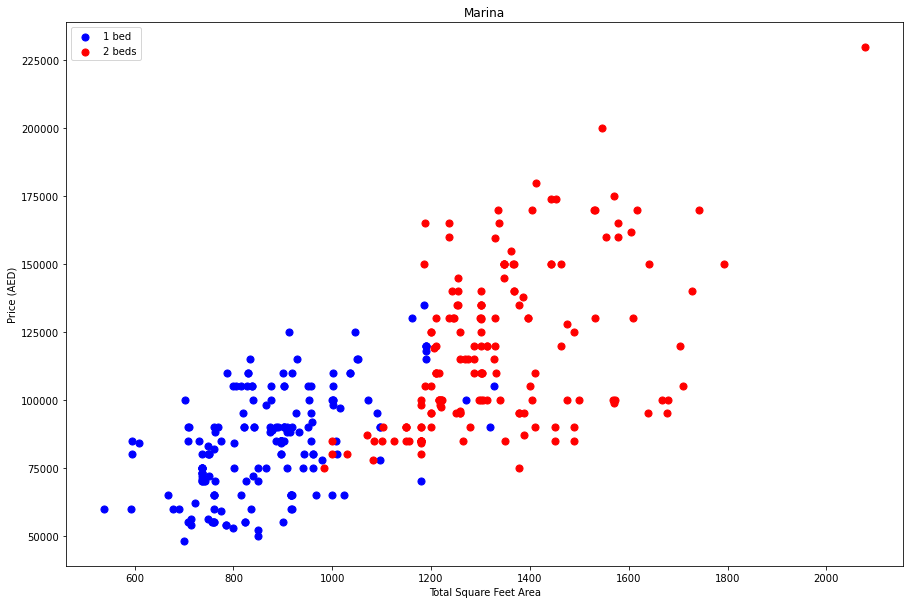

In [28]:
def plot_scatter_chart(df,location):
    beds1 = df[(df.location==location) & (df.beds==1)]
    beds2 = df[(df.location==location) & (df.beds==2)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(beds1.area,beds1.price,color='blue',label='1 bed', s=50)
    plt.scatter(beds2.area,beds2.price,color='red',label='2 beds', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (AED)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df9,'Marina')
df9.shape

I have plotted a scatter graph to show the relationship between price and area. As expected, there is a linear relationship between them.
However, at a closer glance it can be seen that for the same sqft size, some 2 bed apartments are more expensive than the 3 beds. The most likely reason for this is that those apartments are in 2 different buildings, and the 2 bedroom apartments building likely has better amenities. But I am making my price calculator based on area and not individual buildings, so I will treat such apartments as outliers. 
The graph above is for 1 bed and 2 bed apartments in Marina, but similar outliers will exist in other locations too, so I will make a function that will remove these anomalies in all locations.

The function will calculate the mean price for apartments in each area by the number of bedrooms, then all apartments in the same location of the same size but with more bedrooms will be removed if they are cheaper than the apartment with 1 less bed.

In [29]:
def remove_beds_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        beds_stats = {}
        for beds, beds_df in location_df.groupby('beds'):
            beds_stats[beds] = {
                'mean': np.mean(beds_df.rent_per_sqft),
                'std': np.std(beds_df.rent_per_sqft),
                'count': beds_df.shape[0]
            }
        for beds, beds_df in location_df.groupby('beds'):
            stats = beds_stats.get(beds-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, beds_df[beds_df.rent_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df10 = remove_beds_outliers(df9)
df10.shape

(4268, 6)

over 4000 outliers have been removed 

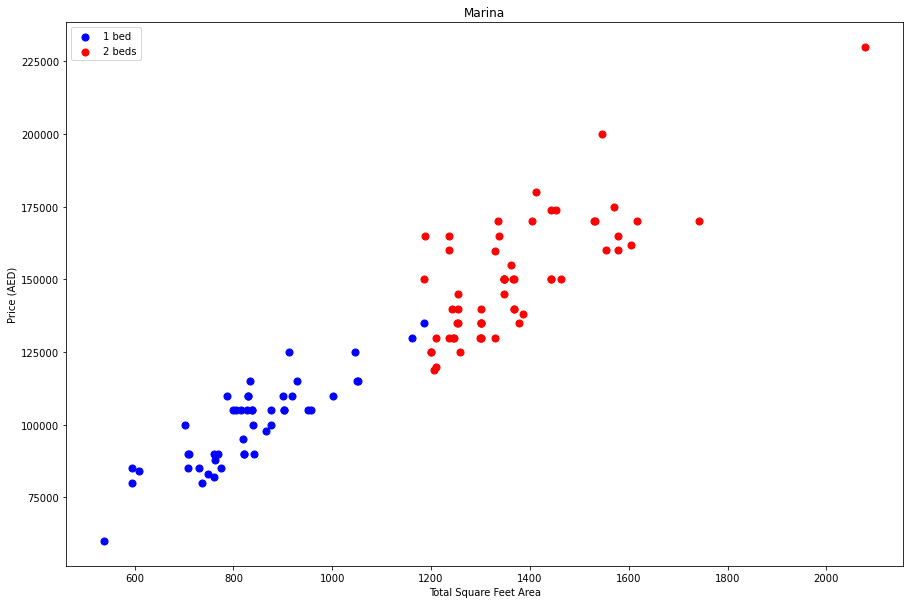

In [30]:
plot_scatter_chart(df10,'Marina')

As you can see, the data is much cleaner now.

# Model Building

I will use one hot encoding to store my locations because they need to be in numeric form

In [31]:
df11 = pd.get_dummies(df10, columns=['location'], prefix='', prefix_sep='')
df11.head()

,price,beds,baths,area,rent_per_sqft,Academic City,Al Badaa,Al Barari,Al Barsha,Al Furjan,...,The Hills,The Lagoons,The Pulse South,The Views,Town Square,Umm Ramool,Umm Suqeim,Wasl Gate,World Trade Centre,other
0,18500.0,0.0,1.0,320.0,57.812500,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18499.0,0.0,1.0,273.0,67.761905,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38500.0,2.0,3.0,1170.0,32.905983,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17999.0,0.0,1.0,385.0,46.750649,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,19500.0,0.0,1.0,410.0,47.560976,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
len(df10.location.unique())

84

In [33]:
X = df11.drop(['price','rent_per_sqft'], axis='columns')
y = df10.price

In [34]:
X.head()

,beds,baths,area,Academic City,Al Badaa,Al Barari,Al Barsha,Al Furjan,Al Garhoud,Al Hudaiba,...,The Hills,The Lagoons,The Pulse South,The Views,Town Square,Umm Ramool,Umm Suqeim,Wasl Gate,World Trade Centre,other
0,0.0,1.0,320.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,1.0,273.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,1170.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,1.0,385.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1.0,410.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test = y_test.values

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8929654172387683

## K fold cross validation to measure accuracy of model

In [56]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.89296542, 0.90121978, 0.88712376, 0.85539766, 0.89965944])

shows high accuracy, and the model isn't being overfitted. So there is no need to use other regression models

Function below allows me to use the the model to make predictions

In [52]:
def predict_price(location,area,baths,beds):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = beds
    x[1] = baths
    x[2] = area
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [58]:
predict_price('Marina',2000,3, 3)


190173.7568359375

# Export as a pickle file

In [40]:
import pickle
with open('dubai_rent_model.pickle','wb') as f:
    pickle.dump(model,f)

In [41]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))